# Uncertainty Analysis
___

In [42]:
clustering_strategy = 'MiniBatchKMeans'

## Setup

### Importing Packages

In [43]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.float_format", "{:.2e}".format)

### Directories

In [44]:
# Data Root Directory
data_root_dir = os.path.join(os.getcwd(), 'Data')

# Test Subset Directory
test_subset_dir = os.path.join(data_root_dir, f'{clustering_strategy}_test_subset.parquet')

# Plot Directory
plot_dir = os.path.join(data_root_dir, 'Analysis_Plots')

In [ ]:
data = pd.read_parquet(test_subset_dir) # Cluster, Prob_0 - Prob_19, Feature: 0 - Feature: 511, Volunteer Labels, Type
print(data.shape)

(13686, 667)
                     Cluster   Prob_0   Prob_1    Prob_2   Prob_3   Prob_4  \
J215433.04-005212.2       17 2.80e-02 2.98e-02 2.70e-215 2.65e-16 3.12e-02   
J215421.46-005236.4       11 1.85e-05 2.18e-05 2.40e-197 6.82e-12 1.45e-05   
J215310.91-010539.4        8 4.42e-02 2.29e-02 2.81e-215 4.83e-16 5.57e-02   
J215058.68-004848.9       16 4.02e-02 2.88e-02 2.67e-215 1.93e-16 2.85e-02   
J215004.98-011454.2       17 4.35e-02 2.06e-02 2.08e-215 2.02e-16 4.56e-02   

                      Prob_5   Prob_6   Prob_7   Prob_8  ...  Prob_14  \
J215433.04-005212.2 2.79e-02 7.43e-38 2.72e-02 8.27e-02  ... 2.66e-02   
J215421.46-005236.4 1.92e-05 1.00e-09 2.06e-05 2.01e-05  ... 1.63e-05   
J215310.91-010539.4 2.99e-02 1.05e-37 2.39e-02 2.90e-01  ... 5.33e-02   
J215058.68-004848.9 2.87e-02 7.20e-38 2.43e-02 7.26e-02  ... 9.58e-02   
J215004.98-011454.2 3.28e-02 4.91e-38 3.10e-02 8.30e-02  ... 3.18e-02   

                     Prob_15  Prob_16  Prob_17  Prob_18  Prob_19  Feature: 0  \

In [19]:
columns = [col for col in data.columns if 'manual' in col]
for col in columns:
    print(col)

disk-edge-on_manual-total
disk-edge-on_yes_manual-fraction
disk-edge-on_no_manual-fraction
merging_manual-total
merging_merger_manual-fraction
merging_tidal-debris_manual-fraction
merging_both_manual-fraction
merging_neither_manual-fraction
smooth-or-featured_manual-total
smooth-or-featured_smooth_manual-fraction
smooth-or-featured_featured-or-disk_manual-fraction
smooth-or-featured_artifact_manual-fraction
how-rounded_manual-total
how-rounded_completely_manual-fraction
how-rounded_in-between_manual-fraction
how-rounded_cigar-shaped_manual-fraction
has-spiral-arms_manual-total
has-spiral-arms_yes_manual-fraction
has-spiral-arms_no_manual-fraction


### Plot number of votes versus distance to cluster

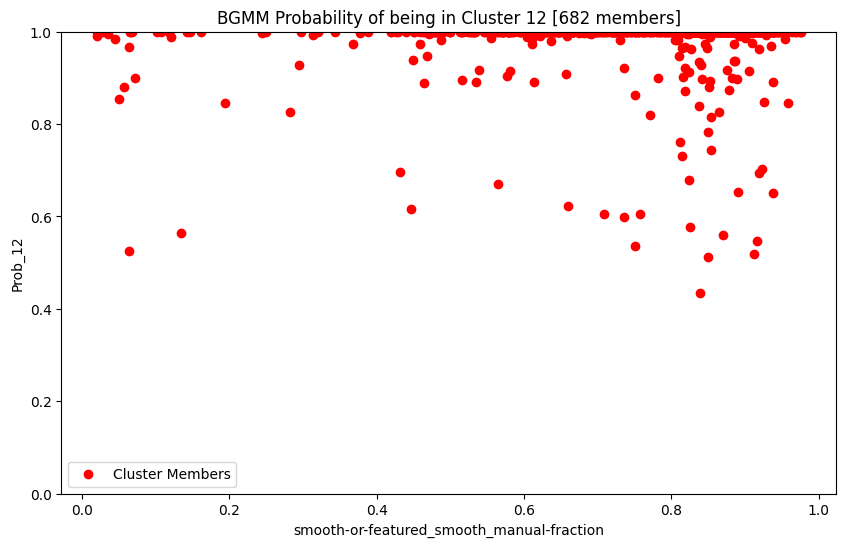

In [25]:
cluster = 12
cluster_subset = data[data['Cluster'] == cluster]
cluster_size = cluster_subset.shape[0]
plt.figure(figsize=(10,6))
#plt.scatter(data['smooth-or-featured_manual-total'], data[f'Prob_{cluster}'])
plt.scatter(cluster_subset['smooth-or-featured_smooth_manual-fraction'], cluster_subset[f'Prob_{cluster}'], color='red', label='Cluster Members')
plt.xlabel('smooth-or-featured_smooth_manual-fraction')
plt.ylabel(f'Prob_{cluster}')
plt.ylim(0, 1)
plt.title(f'{clustering_strategy} Probability of being in Cluster {cluster} [{cluster_size} members]')
plt.legend()
plt.savefig(f'{plot_dir}/{clustering_strategy}_cluster_{cluster}.png')
plt.show()